C:\Users\harle\AppData\Local\Temp\ipykernel_5160\2092134454.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_columns] = df[numeric_columns].applymap(replace_999)


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 221
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       149 non-null    int64  
 1   Site             149 non-null    int64  
 2   Gender           149 non-null    float64
 3   Age              149 non-null    float64
 4   Handedness       149 non-null    float64
 5   DX               149 non-null    int64  
 6   ADHD Measure     149 non-null    int64  
 7   ADHD Index       149 non-null    float64
 8   Inattentive      149 non-null    float64
 9   Hyper/Impulsive  149 non-null    float64
 10  IQ Measure       149 non-null    float64
 11  Verbal IQ        149 non-null    float64
 12  Performance IQ   149 non-null    float64
 13  Full4 IQ         149 non-null    float64
 14  Med Status       149 non-null    float64
 15  QC_Rest_1        149 non-null    float64
 16  QC_Rest_2        149 non-null    float64
 17 

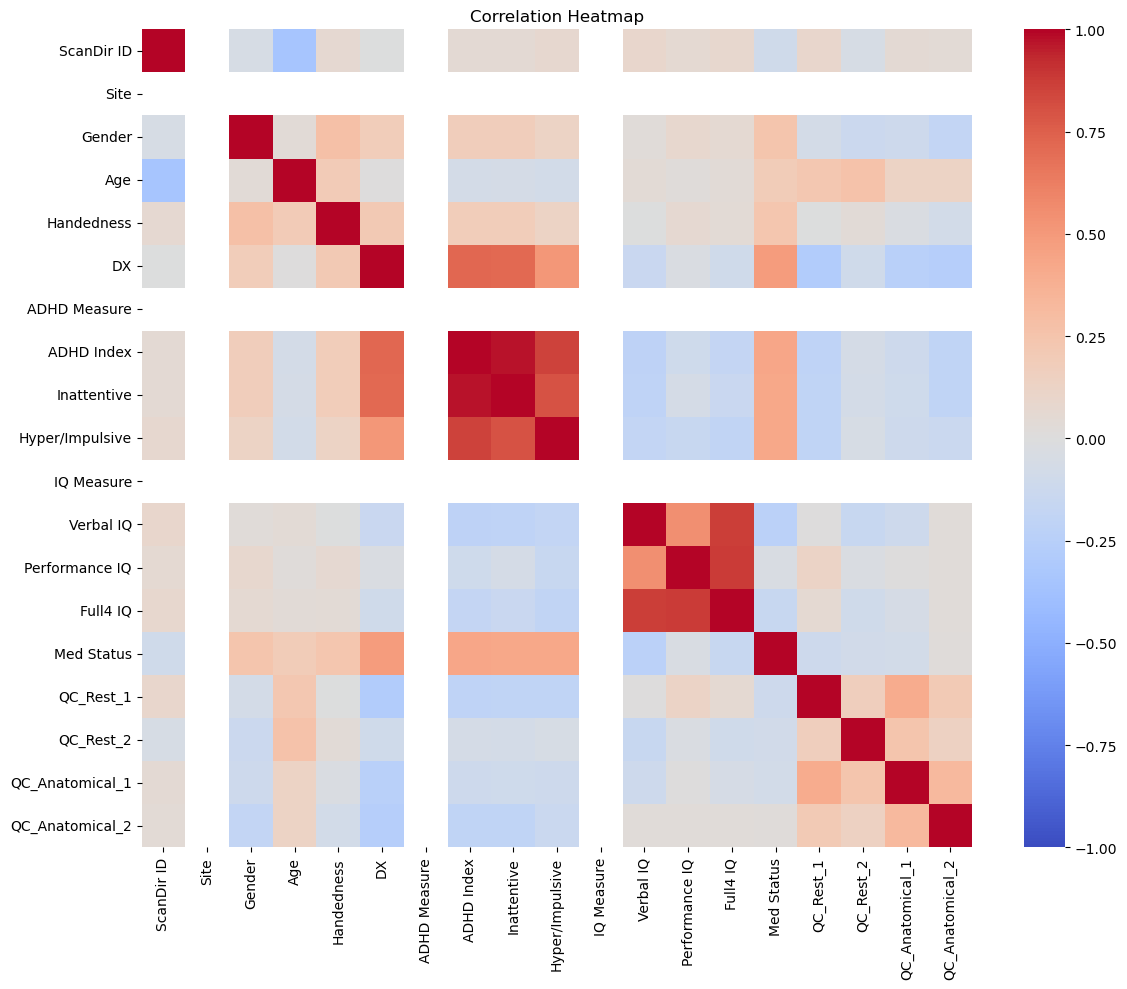

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('NYU_phenotypic.csv')

# Function to replace -999 with NaN
def replace_999(x):
    return np.nan if x == -999 else x

# Apply the function to all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].applymap(replace_999)

# Remove columns with all missing values
df = df.dropna(axis=1, how='all')

# Remove columns with more than 50% missing values
df = df.dropna(axis=1, thresh=len(df)*0.5)

# For remaining columns, fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Handedness'].fillna(df['Handedness'].median(), inplace=True)
df['QC_Rest_1'].fillna(df['QC_Rest_1'].median(), inplace=True)
df['QC_Rest_2'].fillna(df['QC_Rest_2'].median(), inplace=True)
df['QC_Anatomical_1'].fillna(df['QC_Anatomical_1'].median(), inplace=True)
df['QC_Anatomical_2'].fillna(df['QC_Anatomical_2'].median(), inplace=True)

# Drop rows with any remaining missing values
df = df.dropna()

# Display info about the cleaned dataset
print("Cleaned Dataset Info:")
print(df.info())

# Display summary statistics
print("\
Summary Statistics:")
print(df.describe())

# Check for any remaining missing values
print("\
Remaining Missing Values:")
print(df.isnull().sum())

# Save the cleaned dataset
df.to_csv('NYU_phenotypic_cleaned.csv', index=False)
print("\
Cleaned dataset saved as 'NYU_phenotypic_cleaned.csv'")

# Display correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()


Total participants: 149
Participants with ADHD: 107 (71.81%)
ADHD prevalence by gender:
Gender
Female    0.475410
Male      0.886364
Name: DX, dtype: float64
Correlation between Age and ADHD Index: -0.07
Age statistics by diagnosis:
                   mean  median   std
DX_Category                          
ADHD-Combined     11.08   10.41  2.98
ADHD-Hyperactive  11.92   11.92   NaN
ADHD-Inattentive  12.08   11.37  3.06
Control           11.90   11.79  3.08


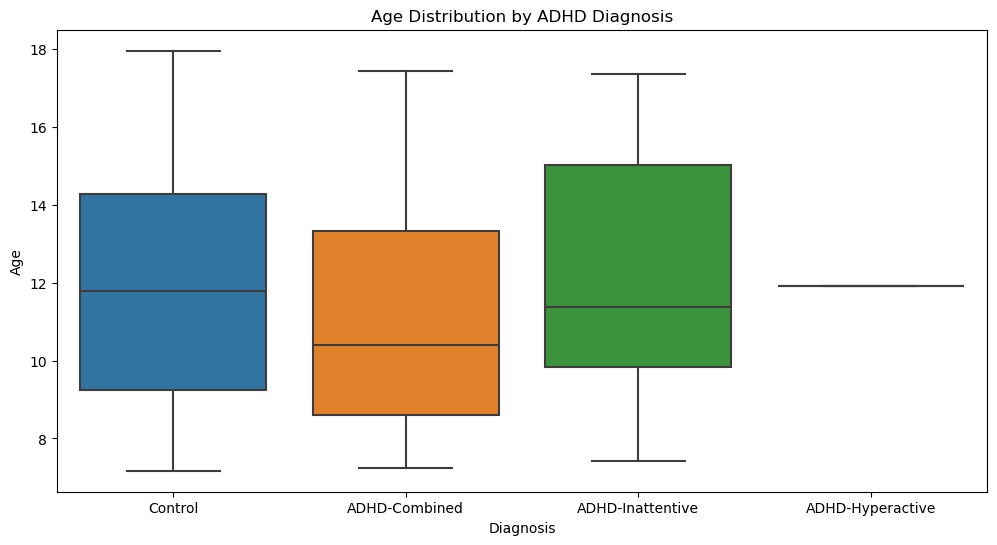

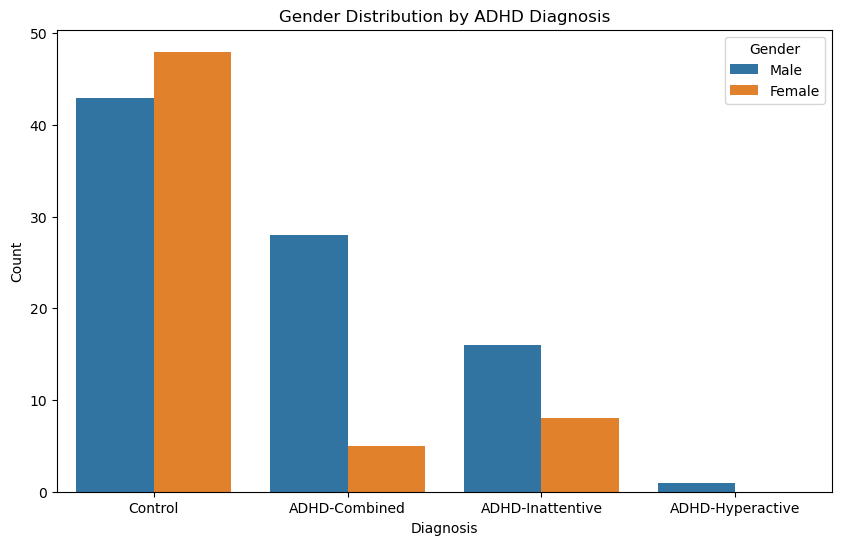

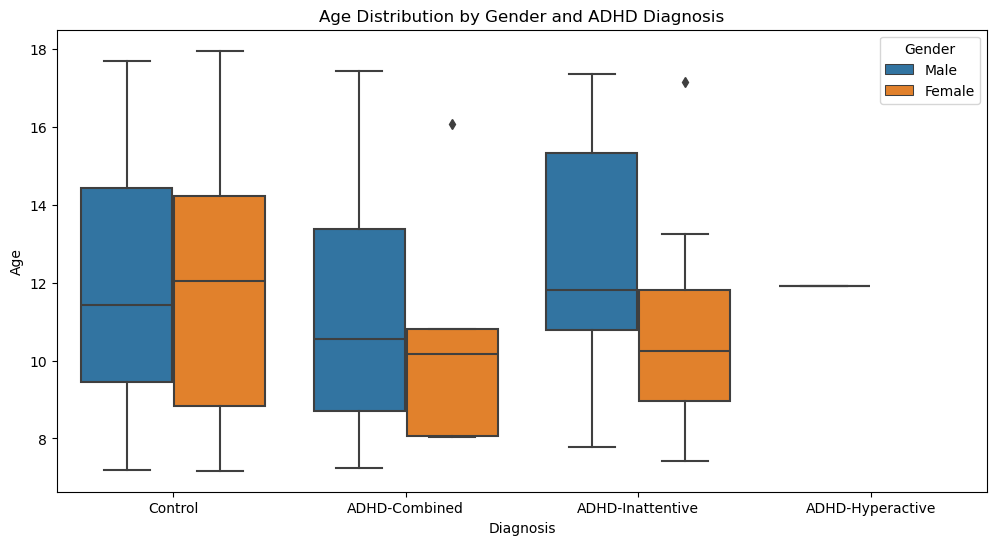

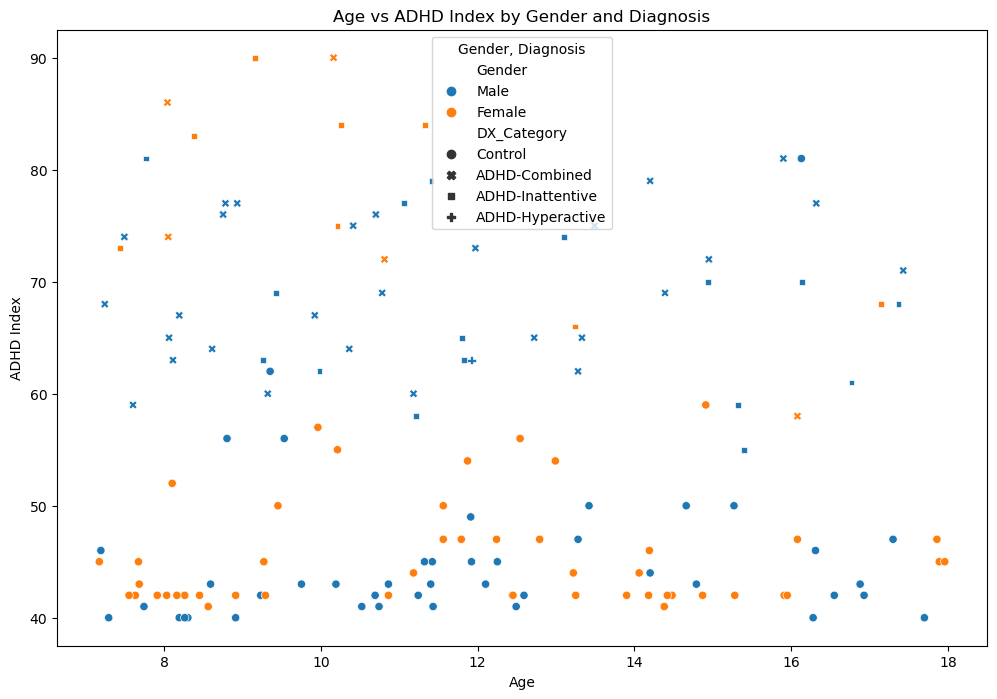

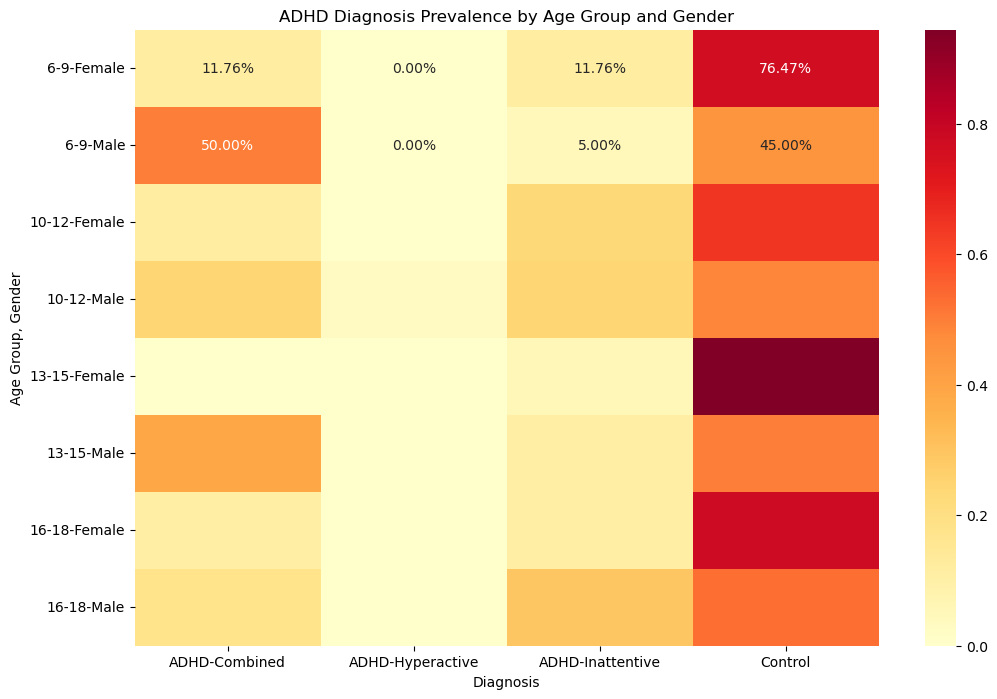

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned CSV file
df = pd.read_csv('NYU_phenotypic_cleaned.csv')

# Convert Gender to categorical
df['Gender'] = df['Gender'].map({0: 'Female', 1: 'Male'})

# Convert DX to categorical
df['DX_Category'] = df['DX'].map({0: 'Control', 1: 'ADHD-Combined', 2: 'ADHD-Hyperactive', 3: 'ADHD-Inattentive'})

# 1. Age distribution by ADHD diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x='DX_Category', y='Age', data=df)
plt.title('Age Distribution by ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')

# 2. Gender distribution by ADHD diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='DX_Category', hue='Gender', data=df)
plt.title('Gender Distribution by ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Gender')

# 3. Age distribution by gender and diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x='DX_Category', y='Age', hue='Gender', data=df)
plt.title('Age Distribution by Gender and ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.legend(title='Gender')

# 4. Scatter plot of Age vs ADHD Index, colored by gender and diagnosis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='ADHD Index', hue='Gender', style='DX_Category', data=df)
plt.title('Age vs ADHD Index by Gender and Diagnosis')
plt.xlabel('Age')
plt.ylabel('ADHD Index')
plt.legend(title='Gender, Diagnosis')

# 5. Heatmap of diagnosis prevalence by age group and gender
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 9, 12, 15, 18], labels=['6-9', '10-12', '13-15', '16-18'])
heatmap_data = pd.crosstab([df['Age_Group'], df['Gender']], df['DX_Category'], normalize='index')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('ADHD Diagnosis Prevalence by Age Group and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group, Gender')

# Calculate some statistics
total_count = len(df)
adhd_count = df['DX'].sum()
adhd_percentage = (adhd_count / total_count) * 100

gender_diagnosis = df.groupby('Gender')['DX'].mean()
age_correlation = df['Age'].corr(df['ADHD Index'])

print(f"\
Total participants: {total_count}")
print(f"Participants with ADHD: {adhd_count} ({adhd_percentage:.2f}%)")
print("\
ADHD prevalence by gender:")
print(gender_diagnosis)
print(f"\
Correlation between Age and ADHD Index: {age_correlation:.2f}")

# Age statistics by diagnosis
age_stats = df.groupby('DX_Category')['Age'].agg(['mean', 'median', 'std']).round(2)
print("\
Age statistics by diagnosis:")
print(age_stats)

C:\Users\harle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


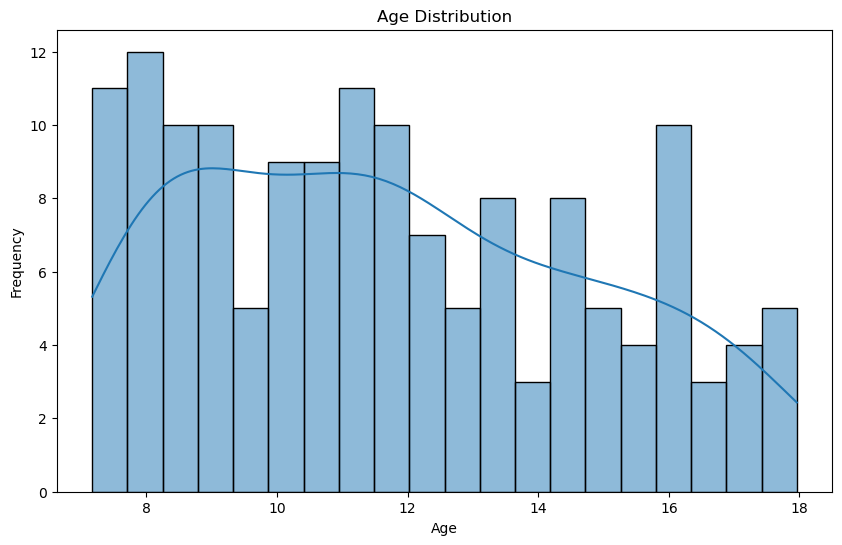

In [201]:
# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Age')

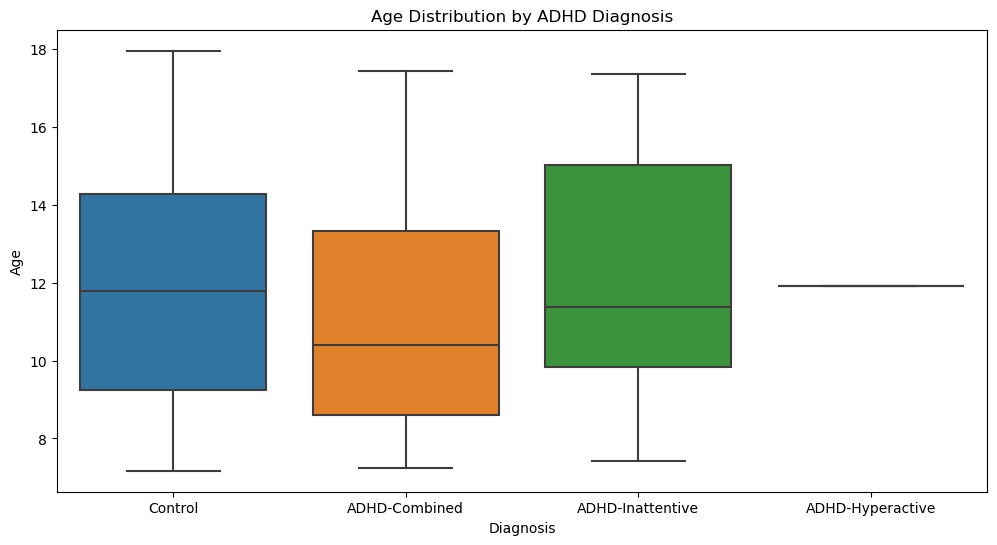

In [229]:
# 1. Age distribution by ADHD diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x='DX_Category', y='Age', data=df)
plt.title('Age Distribution by ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')


In [ ]:
# This boxplot shows the age distribution for each ADHD diagnosis category. We can observe that:

#-The median age for the Control group is slightly higher than for the ADHD groups.
#-ADHD-Inattentive group has the widest age range.
#-ADHD-Combined group seems to have a lower median age compared to other groups.

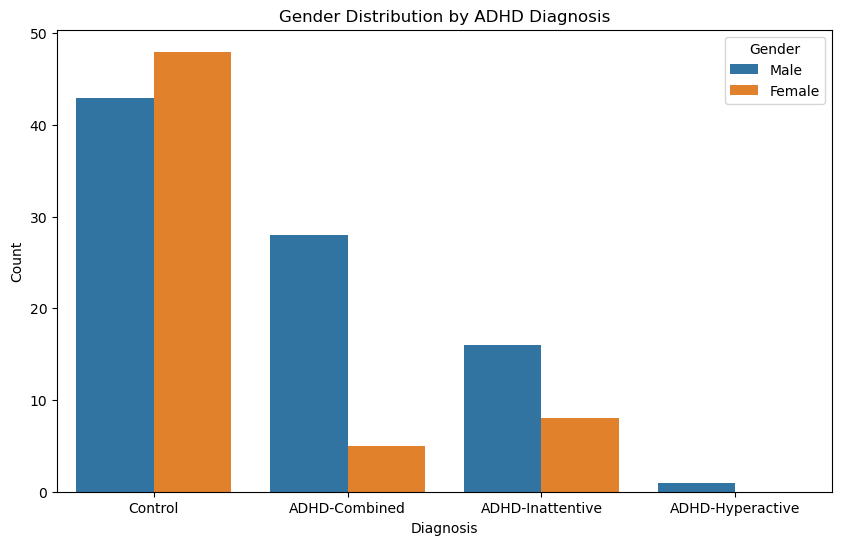

In [3]:
# 2. Gender distribution by ADHD diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='DX_Category', hue='Gender', data=df)
plt.title('Gender Distribution by ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Gender')


In [ ]:
For non-ADHD participants (0), the gender split is relatively balanced (52.75% female, 47.25% male).
For ADHD participants (1), there's a strong male predominance (84.85% male, 15.15% female).
Categories 2 and 3 have very few participants, which might represent different subtypes or severity levels of ADHD.

<function matplotlib.pyplot.show(close=None, block=None)>

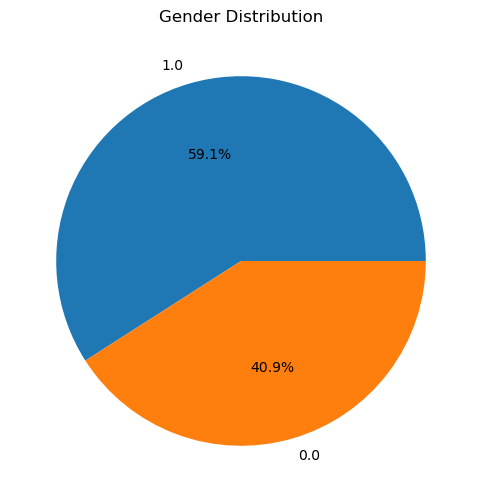

In [27]:
# 5. Gender Distribution
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show

In [ ]:
#Males:
# Count: 142
# Percentage: 63.96%


# Females:
# Count: 79
# Percentage: 35.59%

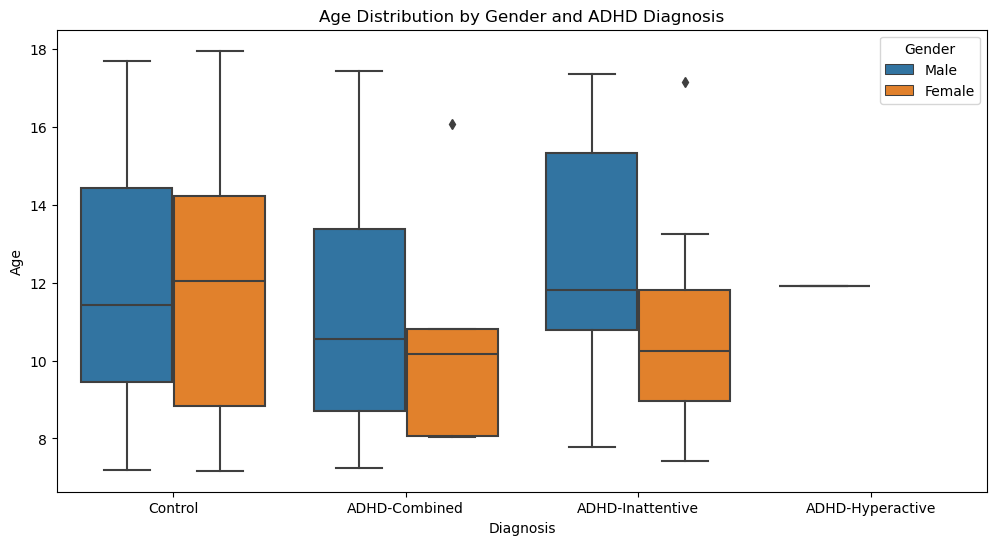

In [11]:
# 3. Age distribution by gender and diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x='DX_Category', y='Age', hue='Gender', data=df)
plt.title('Age Distribution by Gender and ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.legend(title='Gender')

In [ ]:
# This scatter plot shows the relationship between Age and ADHD Index, colored by gender and diagnosis:

# There's a slight negative correlation between Age and ADHD Index (correlation coefficient: -0.07).
# ADHD diagnoses (Combined and Inattentive) tend to have higher ADHD Index scores compared to the Control group.
# There's no clear gender-based pattern in the relationship between Age and ADHD Index.

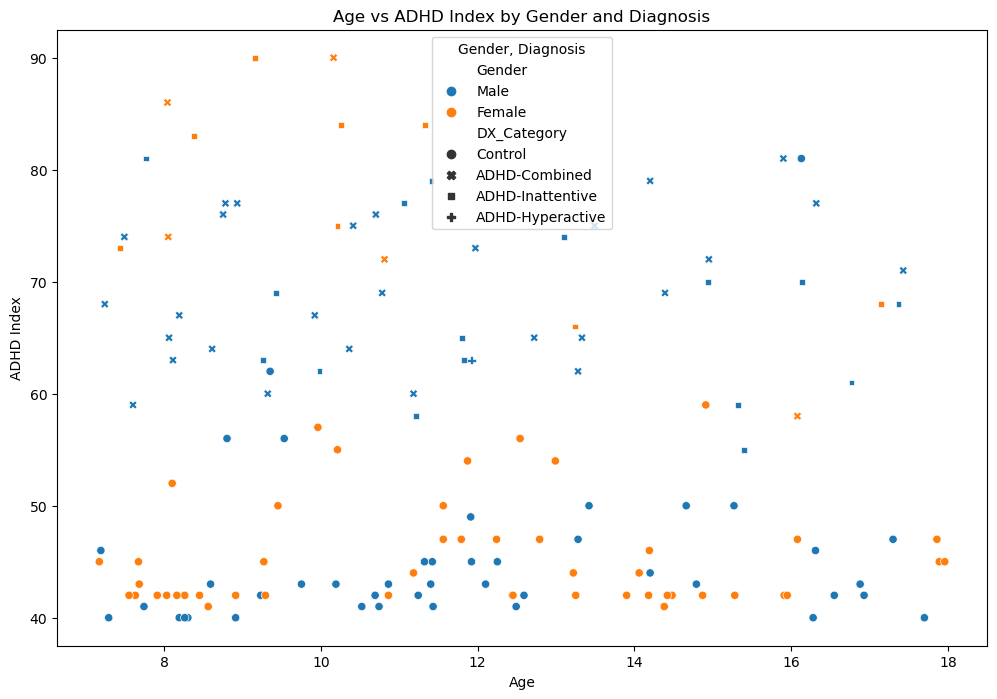

In [13]:
# 4. Scatter plot of Age vs ADHD Index, colored by gender and diagnosis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='ADHD Index', hue='Gender', style='DX_Category', data=df)
plt.title('Age vs ADHD Index by Gender and Diagnosis')
plt.xlabel('Age')
plt.ylabel('ADHD Index')
plt.legend(title='Gender, Diagnosis')


Total participants: 149
Participants with ADHD: 107 (71.81%)
ADHD prevalence by gender:
Gender
Female    0.475410
Male      0.886364
Name: DX, dtype: float64
Correlation between Age and ADHD Index: -0.07
Age statistics by diagnosis:
                   mean  median   std
DX_Category                          
ADHD-Combined     11.08   10.41  2.98
ADHD-Hyperactive  11.92   11.92   NaN
ADHD-Inattentive  12.08   11.37  3.06
Control           11.90   11.79  3.08


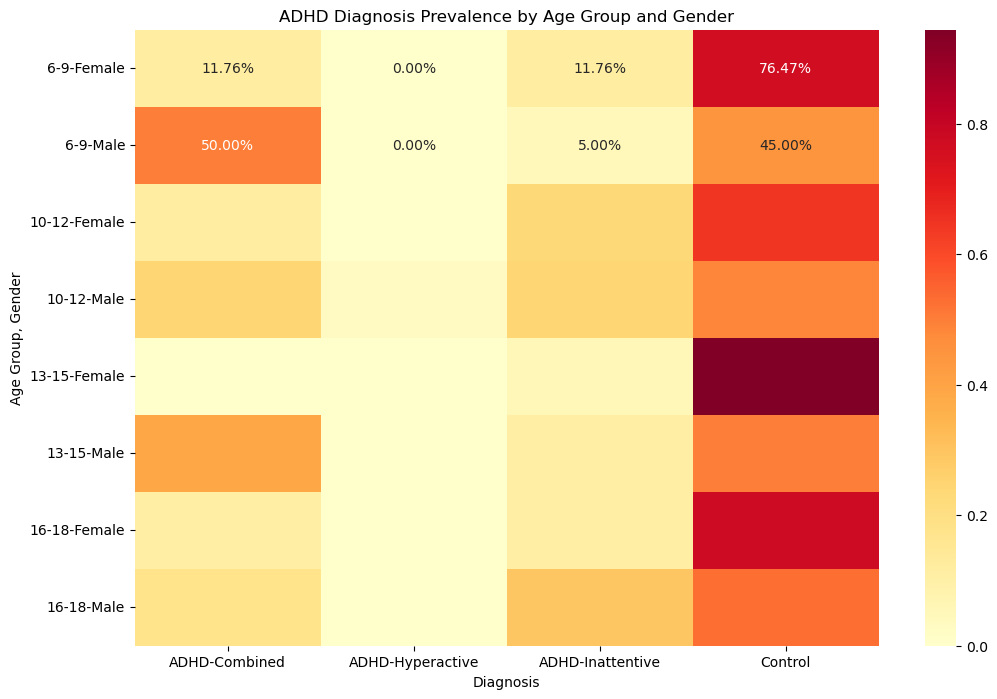

In [15]:
# 5. Heatmap of diagnosis prevalence by age group and gender
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 9, 12, 15, 18], labels=['6-9', '10-12', '13-15', '16-18'])
heatmap_data = pd.crosstab([df['Age_Group'], df['Gender']], df['DX_Category'], normalize='index')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('ADHD Diagnosis Prevalence by Age Group and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group, Gender')

# Calculate some statistics
total_count = len(df)
adhd_count = df['DX'].sum()
adhd_percentage = (adhd_count / total_count) * 100

gender_diagnosis = df.groupby('Gender')['DX'].mean()
age_correlation = df['Age'].corr(df['ADHD Index'])

print(f"\
Total participants: {total_count}")
print(f"Participants with ADHD: {adhd_count} ({adhd_percentage:.2f}%)")
print("\
ADHD prevalence by gender:")
print(gender_diagnosis)
print(f"\
Correlation between Age and ADHD Index: {age_correlation:.2f}")

# Age statistics by diagnosis
age_stats = df.groupby('DX_Category')['Age'].agg(['mean', 'median', 'std']).round(2)
print("\
Age statistics by diagnosis:")
print(age_stats)

In [96]:
# This heatmap shows the prevalence of each diagnosis across age groups and genders:

# ADHD-Combined is most prevalent in younger age groups (6-9 and 10-12) for both genders.
# ADHD-Inattentive becomes more prevalent in older age groups, especially for females.
# The Control group has a higher prevalence in males across all age groups compared to females.

# Data Preparation

In [116]:
categorical_val

['Site',
 'Gender',
 'DX',
 'ADHD Measure',
 'IQ Measure',
 'Med Status',
 'QC_Rest_1',
 'QC_Rest_2',
 'QC_Anatomical_1',
 'QC_Anatomical_2',
 'DX_Category',
 'Age_Group']

In [49]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [53]:

dataset = pd.get_dummies(df, columns = categorical_val)

In [55]:
dataset.info

<bound method DataFrame.info of      ScanDir ID    Age  Handedness  ADHD Index  Inattentive  Hyper/Impulsive  \
0       1000804   7.29        0.83        40.0         41.0             41.0   
2       1057962   8.78        0.65        77.0         81.0             80.0   
3       1099481   8.04        0.50        86.0         82.0             85.0   
4       1127915  12.44        0.21        42.0         43.0             44.0   
7       1283494   8.61        0.67        64.0         69.0             65.0   
..          ...    ...         ...         ...          ...              ...   
210       10088  14.66        0.91        50.0         48.0             43.0   
212       10124  14.06        0.62        44.0         43.0             44.0   
214       10125   7.19        0.33        46.0         46.0             45.0   
218       10128   9.53        0.82        56.0         58.0             60.0   
221       10043   8.16        0.36        42.0         42.0             45.0   

     Ve

In [57]:
print(dataset.columns)


Index(['ScanDir ID', 'Age', 'Handedness', 'ADHD Index', 'Inattentive',
       'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Site_5',
       'Gender_0.0', 'Gender_1.0', 'DX_0', 'DX_1', 'DX_2', 'DX_3',
       'ADHD Measure_2', 'IQ Measure_2.0', 'Med Status_1.0', 'Med Status_2.0',
       'QC_Rest_1_0.0', 'QC_Rest_1_1.0', 'QC_Rest_2_0.0', 'QC_Rest_2_1.0',
       'QC_Anatomical_1_0.0', 'QC_Anatomical_1_1.0', 'QC_Anatomical_2_0.0',
       'QC_Anatomical_2_1.0'],
      dtype='object')


In [59]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Age','ADHD Index', 'Inattentive', 'Hyper/Impulsive']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
dataset.head()

,ScanDir ID,Age,Handedness,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Site_5,...,Med Status_1.0,Med Status_2.0,QC_Rest_1_0.0,QC_Rest_1_1.0,QC_Rest_2_0.0,QC_Rest_2_1.0,QC_Anatomical_1_0.0,QC_Anatomical_1_1.0,QC_Anatomical_2_0.0,QC_Anatomical_2_1.0
0,1000804,-1.469267,0.83,-1.069093,-0.987167,-1.017398,112.0,103.0,109.0,True,...,True,False,False,True,True,False,False,True,False,True
2,1057962,-0.978317,0.65,1.545773,1.850998,1.853947,131.0,121.0,129.0,True,...,True,False,False,True,False,True,False,True,True,False
3,1099481,-1.222144,0.50,2.181822,1.921952,2.222068,109.0,120.0,116.0,True,...,True,False,False,True,True,False,False,True,False,True
4,1127915,0.227640,0.21,-0.927749,-0.845259,-0.796525,117.0,126.0,124.0,True,...,True,False,False,True,False,True,False,True,False,True
7,1283494,-1.034331,0.67,0.627037,0.999548,0.749584,106.0,106.0,107.0,True,...,True,False,False,True,True,False,False,True,False,True


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [203]:
# Prepare the features and target variable
X = df[['Age', 'Gender', 'Handedness', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full4 IQ']]
y = df['DX']

# Convert Gender to numeric (0 for Male, 1 for Female)
# Convert Gender to numeric (0 for Male, 1 for Female) using .loc to avoid the warning




In [205]:
X_train

,Age,Gender,Handedness,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ
37,10.78,1.0,1.00,69.0,73.0,74.0,106.0,107.0,107.0
24,8.45,0.0,0.91,42.0,42.0,45.0,111.0,112.0,114.0
94,9.29,0.0,0.11,42.0,42.0,43.0,107.0,93.0,100.0
19,11.18,1.0,0.52,60.0,61.0,66.0,96.0,118.0,107.0
68,9.27,0.0,0.33,45.0,48.0,65.0,134.0,98.0,116.0
...,...,...,...,...,...,...,...,...,...
106,9.42,1.0,1.00,69.0,67.0,70.0,99.0,87.0,92.0
151,14.48,0.0,0.82,42.0,45.0,47.0,113.0,106.0,111.0
22,8.91,1.0,0.19,40.0,40.0,41.0,91.0,109.0,100.0
135,13.90,0.0,-0.20,42.0,47.0,47.0,122.0,106.0,116.0


In [207]:
X_test

,Age,Gender,Handedness,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ
109,10.86,0.0,0.82,42.0,42.0,43.0,99.0,111.0,106.0
29,10.41,1.0,0.91,75.0,74.0,72.0,109.0,106.0,109.0
164,9.96,0.0,0.40,57.0,55.0,66.0,120.0,99.0,110.0
119,16.31,1.0,1.00,46.0,46.0,43.0,83.0,83.0,81.0
117,17.43,1.0,1.00,71.0,69.0,75.0,119.0,97.0,109.0
54,10.21,0.0,0.20,75.0,68.0,63.0,104.0,97.0,100.0
92,9.98,1.0,0.74,62.0,64.0,46.0,130.0,127.0,132.0
193,14.42,0.0,0.75,42.0,45.0,44.0,132.0,124.0,132.0
99,11.32,1.0,0.73,45.0,44.0,44.0,141.0,133.0,142.0
124,17.89,0.0,1.00,45.0,45.0,55.0,127.0,124.0,128.0


In [156]:
y_train

22     1
15     0
65     0
11     1
42     0
      ..
71     3
106    0
14     0
92     0
102    0
Name: DX, Length: 119, dtype: int64

In [161]:
y_test

73     0
18     1
117    0
78     0
76     1
31     3
64     3
140    0
68     0
82     0
109    1
12     0
36     1
9      0
19     0
56     3
136    0
69     0
55     0
131    3
29     0
123    3
26     0
127    3
128    0
144    0
110    1
101    3
45     0
30     0
Name: DX, dtype: int64

# Machine Learning

## Logistic Regression

In [211]:
# model 1: LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 89.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2          3  accuracy   macro avg  \
precision   0.959459   0.851852  1.0   0.705882   0.89916    0.879298   
recall      0.972603   0.821429  1.0   0.705882   0.89916    0.874978   
f1-score    0.965986   0.836364  1.0   0.705882   0.89916    0.877058   
support    73.000000  28.000000  1.0  17.000000   0.89916  119.000000   

           weighted avg  
precision      0.898255  
recall         0.899160  
f1-score       0.898615  
support      119.000000  
_______________________________________________
Confusion Matrix: 
 [[71  1  0  1]
 [ 1 23  0  4]
 [ 0  0  1  0]
 [ 2  3  0 12]]

Test Result:
Accuracy Score: 83.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  accuracy  macro avg  weighted avg
precision   1.000000  0.555556  0.750000  0.833333   0.768519      0.867593
recall 

In [73]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.915966,83.333333


## KNN

In [71]:
# Tailoring the KNN code to display classification report, confusion matrix, and accuracy score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the KNN model
knn_clf = KNeighborsClassifier()

# Fit the model to the training data
knn_clf.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# Function to print classification report, confusion matrix, and accuracy
def print_evaluation_report(model, X_train, y_train, X_test, y_test, dataset_type):
    # Predictions for the specified dataset (training or testing)
    if dataset_type == "Training":
        y_pred = model.predict(X_train)
        y_true = y_train
    else:
        y_pred = model.predict(X_test)
        y_true = y_test

    # Print classification report
    print(f"\nClassification Report for {dataset_type} Data")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Print confusion matrix
    print(f"\nConfusion Matrix for {dataset_type} Data")
    print(confusion_matrix(y_true, y_pred))

    # Print accuracy score
    print(f"\nAccuracy Score for {dataset_type} Data: {accuracy_score(y_true, y_pred)}")
    print("\n" + "-"*60 + "\n")

# Evaluate the KNN model on both the training and test sets
print_evaluation_report(knn_clf, X_train, y_train, X_test, y_test, "Training")
print_evaluation_report(knn_clf, X_train, y_train, X_test, y_test, "Test")



Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.68      0.82      0.74        28
           2       0.00      0.00      0.00         1
           3       0.60      0.35      0.44        17

    accuracy                           0.85       119
   macro avg       0.56      0.54      0.54       119
weighted avg       0.83      0.85      0.83       119


Confusion Matrix for Training Data
[[72  1  0  0]
 [ 1 23  0  4]
 [ 0  1  0  0]
 [ 2  9  0  6]]

Accuracy Score for Training Data: 0.8487394957983193

------------------------------------------------------------


Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.33      0.80      0.47         5
           3       0.00      0.00      0.00         7

    accuracy                           0.63        30
 

In [75]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.915966,83.333333
1,K-nearest neighbors,84.873950,63.333333


## SVM

In [77]:
# Tailoring the SVM code to handle class imbalance and address the UndefinedMetricWarning

from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM model with class_weight='balanced' to handle class imbalance
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0, class_weight='balanced')

# Fit the model to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Function to print classification report
def print_classification_report(y_true, y_pred, dataset_type):
    print(f"Classification Report for {dataset_type} Data")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("\n" + "-"*60 + "\n")

# Print classification reports for both training and test sets
print_classification_report(y_train, y_train_pred, "Training")
print_classification_report(y_test, y_test_pred, "Test")


Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        17

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


------------------------------------------------------------

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7

    accuracy                           0.60        30
   macro avg       0.20      0.33      0.25        30
weighted avg       0.36      0.60      0.45        30


--------------------------------------------

In [182]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM model with class_weight='balanced' to handle class imbalance
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0, class_weight='balanced')

# Fit the model to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Function to print classification report
def print_classification_report(y_true, y_pred, dataset_type):
    print(f"Classification Report for {dataset_type} Data")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("\n" + "-"*60 + "\n")

# Print classification reports for both training and test sets
print_classification_report(y_train, y_train_pred, "Training")
print_classification_report(y_test, y_test_pred, "Test")


Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        17

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


------------------------------------------------------------

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7

    accuracy                           0.60        30
   macro avg       0.20      0.33      0.25        30
weighted avg       0.36      0.60      0.45        30


--------------------------------------------

In [79]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.915966,83.333333
1,K-nearest neighbors,84.873950,63.333333
2,Support Vector Machine,100.000000,60.000000


## Decision Trees

In [209]:
# Model 4: Decision Tree
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1    2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0  1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0  1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0  1.0   1.0       1.0        1.0           1.0
support    73.0  28.0  1.0  17.0       1.0      119.0         119.0
_______________________________________________
Confusion Matrix: 
 [[73  0  0  0]
 [ 0 28  0  0]
 [ 0  0  1  0]
 [ 0  0  0 17]]

Test Result:
Accuracy Score: 76.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  accuracy  macro avg  weighted avg
precision   1.000000  0.500000  0.500000  0.766667   0.666667      0.800000
recall      0.888889  0.800000  0.428571  0.766667   0.705820      0.766667
f1-score    0.941176  0.615385  0.461538  0.766667   0.672700      0.774962
support   

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_clf.fit(X_train, y_train)

# Function to print classification report, confusion matrix, and accuracy
def print_evaluation_report(model, X_train, y_train, X_test, y_test, dataset_type):
    # Predictions for the specified dataset (training or testing)
    if dataset_type == "Training":
        y_pred = model.predict(X_train)
        y_true = y_train
    else:
        y_pred = model.predict(X_test)
        y_true = y_test

    # Print classification report
    print(f"\nClassification Report for {dataset_type} Data")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Print confusion matrix
    print(f"\nConfusion Matrix for {dataset_type} Data")
    print(confusion_matrix(y_true, y_pred))

    # Print accuracy score
    print(f"\nAccuracy Score for {dataset_type} Data: {accuracy_score(y_true, y_pred)}")
    print("\n" + "-"*60 + "\n")

# Evaluate the Decision Tree model on both the training and test sets
print_evaluation_report(tree_clf, X_train, y_train, X_test, y_test, "Training")
print_evaluation_report(tree_clf, X_train, y_train, X_test, y_test, "Test")



Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        17

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


Confusion Matrix for Training Data
[[73  0  0  0]
 [ 0 28  0  0]
 [ 0  0  1  0]
 [ 0  0  0 17]]

Accuracy Score for Training Data: 1.0

------------------------------------------------------------


Classification Report for Test Data
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.50      0.80      0.62         5
           3       0.50      0.43      0.46         7

    accuracy                           0.77        30
   macro avg    

In [83]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.915966,83.333333
1,K-nearest neighbors,84.873950,63.333333
2,Support Vector Machine,100.000000,60.000000
3,Decision Tree Classifier,100.000000,76.666667


## Random Forest 

In [85]:
# Model 5: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1    2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0  1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0  1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0  1.0   1.0       1.0        1.0           1.0
support    73.0  28.0  1.0  17.0       1.0      119.0         119.0
_______________________________________________
Confusion Matrix: 
 [[73  0  0  0]
 [ 0 28  0  0]
 [ 0  0  1  0]
 [ 0  0  0 17]]

Test Result:
Accuracy Score: 76.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  accuracy  macro avg  weighted avg
precision   1.000000  0.444444  0.500000  0.766667   0.648148      0.790741
recall      0.944444  0.800000  0.285714  0.766667   0.676720      0.766667
f1-score    0.971429  0.571429  0.363636  0.766667   0.635498      0.762944
support   

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Function to print classification report, confusion matrix, and accuracy
def print_evaluation_report(model, X_train, y_train, X_test, y_test, dataset_type):
    # Predictions for the specified dataset (training or testing)
    if dataset_type == "Training":
        y_pred = model.predict(X_train)
        y_true = y_train
    else:
        y_pred = model.predict(X_test)
        y_true = y_test

    # Print classification report
    print(f"\nClassification Report for {dataset_type} Data")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Print confusion matrix
    print(f"\nConfusion Matrix for {dataset_type} Data")
    print(confusion_matrix(y_true, y_pred))

    # Print accuracy score
    print(f"\nAccuracy Score for {dataset_type} Data: {accuracy_score(y_true, y_pred)}")
    print("\n" + "-"*60 + "\n")

# Evaluate the Random Forest model on both the training and test sets
print_evaluation_report(rf_clf, X_train, y_train, X_test, y_test, "Training")
print_evaluation_report(rf_clf, X_train, y_train, X_test, y_test, "Test")



Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        17

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


Confusion Matrix for Training Data
[[73  0  0  0]
 [ 0 28  0  0]
 [ 0  0  1  0]
 [ 0  0  0 17]]

Accuracy Score for Training Data: 1.0

------------------------------------------------------------


Classification Report for Test Data
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.44      0.80      0.57         5
           3       0.50      0.29      0.36         7

    accuracy                           0.77        30
   macro avg    

In [87]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.915966,83.333333
1,K-nearest neighbors,84.873950,63.333333
2,Support Vector Machine,100.000000,60.000000
3,Decision Tree Classifier,100.000000,76.666667
4,Random Forest Classifier,100.000000,76.666667


In [317]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)

print_score(gbm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1    2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0  1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0  1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0  1.0   1.0       1.0        1.0           1.0
support    73.0  28.0  1.0  17.0       1.0      119.0         119.0
_______________________________________________
Confusion Matrix: 
 [[73  0  0  0]
 [ 0 28  0  0]
 [ 0  0  1  0]
 [ 0  0  0 17]]

Test Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  accuracy  macro avg  weighted avg
precision   0.941176  0.444444  0.250000       0.7   0.545207      0.697113
recall      0.888889  0.800000  0.142857       0.7   0.610582      0.700000
f1-score    0.914286  0.571429  0.181818       0.7   0.555844      0.686234
support   

In [325]:
test_score = accuracy_score(y_test, gbm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gbm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Gradient Boosting Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.915966,83.333333
1,K-nearest neighbors,84.873950,63.333333
2,Support Vector Machine,100.000000,60.000000
3,Decision Tree Classifier,100.000000,76.666667
4,Random Forest Classifier,100.000000,76.666667
5,Gradient Boosting Classifier,100.000000,70.000000


In [321]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

print_score(nb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(nb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.39%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2          3  accuracy   macro avg  \
precision   1.000000   0.758621  1.0   0.578947   0.87395    0.834392   
recall      0.958904   0.785714  1.0   0.647059   0.87395    0.847919   
f1-score    0.979021   0.771930  1.0   0.611111   0.87395    0.840515   
support    73.000000  28.000000  1.0  17.000000   0.87395  119.000000   

           weighted avg  
precision      0.883054  
recall         0.873950  
f1-score       0.877911  
support      119.000000  
_______________________________________________
Confusion Matrix: 
 [[70  1  0  2]
 [ 0 22  0  6]
 [ 0  0  1  0]
 [ 0  6  0 11]]

Test Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  accuracy  macro avg  weighted avg
precision   1.000000  0.400000  0.400000       0.7   0.600000      0.760000
recall 

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize the Gaussian Naive Bayes model
nb_clf = GaussianNB()

# Fit the model to the training data
nb_clf.fit(X_train, y_train)

# Now you can make predictions
test_score = accuracy_score(y_test, nb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, nb_clf.predict(X_train)) * 100

# Store results in a DataFrame
results_df_2 = pd.DataFrame(data=[["Gaussian Naive Bayes", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Display results
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

# Display results
print(results_df)


                      Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression            89.915966           83.333333
1       K-nearest neighbors            84.873950           63.333333
2    Support Vector Machine           100.000000           60.000000
3  Decision Tree Classifier           100.000000           76.666667
4  Random Forest Classifier           100.000000           76.666667
5      Gaussian Naive Bayes            87.394958           70.000000


# Tuned Models

## Tuned Logistic Regression

In [99]:
# Logistic Regression Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 545.5594781168514, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 92.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2          3  accuracy   macro avg  \
precision   0.986301   0.833333  1.0   0.800000   0.92437    0.904909   
recall      0.986301   0.892857  1.0   0.705882   0.92437    0.896260   
f1-score    0.986301   0.862069  1.0   0.750000   0.92437    0.899593   
support    73.000000  28.000000  1.0  17.000000   0.92437  119.000000   

           weighted avg  
precision      0.923810  
recall         0.924370  
f1-score       0.923428  
support      119.000000  
_______________________________________________
Confusion Matrix: 
 [[72  1  0  0]
 [ 0 25  0  3]
 [ 0  0  1  0]
 [ 1  4  0 12]]

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  accuracy  macro avg  weighted avg
precision   1.0000

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Parameter grid for logistic regression
params = {
    "C": np.logspace(-4, 4, 20),  # Tuning C values for regularization
    "solver": ["liblinear"]  # Use liblinear solver for binary classification or small datasets
}

# Initialize logistic regression model
lr_clf = LogisticRegression()

# Set up GridSearchCV
lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)

# Fit the model with GridSearchCV
lr_cv.fit(X_train, y_train)

# Get the best parameters and model
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator directly from GridSearchCV
best_lr_clf = lr_cv.best_estimator_

# Evaluate the model using accuracy
train_score = best_lr_clf.score(X_train, y_train)
test_score = best_lr_clf.score(X_test, y_test)

print(f"Training Accuracy: {train_score * 100:.2f}%")
print(f"Testing Accuracy: {test_score * 100:.2f}%")

# Optionally, if you have a custom print_score function, use it here
#print_score(best_lr_clf, X_train, y_train, X_test, y_test)
print_score(best_lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(best_lr_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 545.5594781168514, 'solver': 'liblinear'}
Training Accuracy: 92.44%
Testing Accuracy: 80.00%
Train Result:
Accuracy Score: 92.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2          3  accuracy   macro avg  \
precision   0.986301   0.833333  1.0   0.800000   0.92437    0.904909   
recall      0.986301   0.892857  1.0   0.705882   0.92437    0.896260   
f1-score    0.986301   0.862069  1.0   0.750000   0.92437    0.899593   
support    73.000000  28.000000  1.0  17.000000   0.92437  119.000000   

           weighted avg  
precision      0.923810  
recall         0.924370  
f1-score       0.923428  
support      119.000000  
_______________________________________________
Confusion Matrix: 
 [[72  1  0  0]
 [ 0 25  0  3]
 [ 0  0  1  0]
 [ 1  4  0 12]]

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  a

In [105]:
test_score = accuracy_score(y_test, best_lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, best_lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,92.436975,80.0


In [107]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


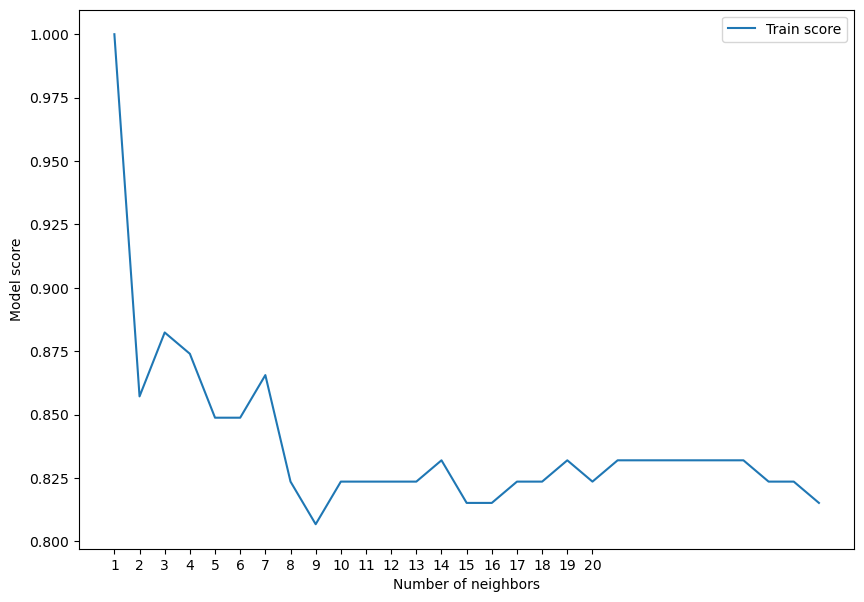

In [109]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [111]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.35%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2     3  accuracy   macro avg  weighted avg
precision   0.911392   0.650000  0.0   0.0  0.823529    0.390348      0.712031
recall      0.986301   0.928571  0.0   0.0  0.823529    0.478718      0.823529
f1-score    0.947368   0.764706  0.0   0.0  0.823529    0.428019      0.761090
support    73.000000  28.000000  1.0  17.0  0.823529  119.000000    119.000000
_______________________________________________
Confusion Matrix: 
 [[72  1  0  0]
 [ 2 26  0  0]
 [ 0  1  0  0]
 [ 5 12  0  0]]

Test Result:
Accuracy Score: 73.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1    3  accuracy  macro avg  weighted avg
precision   0.944444  0.454545  0.0  0.733333   0.466330      0.642424
recall      0.944444  1.000000  0.0  0.733333   0.648148      0.733333
f1-score    0.944444  0.625000  0.0  0.733333  

C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
# Create the results DataFrame for Tuned K-nearest neighbors
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100
results_df_2 = pd.DataFrame(
    data=[["Tuned K-nearest neighbors", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Concatenate the new results to tuning_results_df
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated DataFrame
tuning_results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,92.436975,80.000000
1,Tuned K-nearest neighbors,82.352941,73.333333


In [115]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'C': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 93.28%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2          3  accuracy   macro avg  \
precision   0.972973   0.866667  0.0   0.866667  0.932773    0.676577   
recall      0.986301   0.928571  0.0   0.764706  0.932773    0.669895   
f1-score    0.979592   0.896552  0.0   0.812500  0.932773    0.672161   
support    73.000000  28.000000  1.0  17.000000  0.932773  119.000000   

           weighted avg  
precision      0.924597  
recall         0.932773  
f1-score       0.927951  
support      119.000000  
_______________________________________________
Confusion Matrix: 
 [[72  1  0  0]
 [ 0 26  0  2]
 [ 0  1  0  0]
 [ 2  2  0 13]]

Test Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1         3  accuracy  macro avg  weighted avg
precision   1.000000  0.3636

C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [305]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Support Vector Machine", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Use pd.concat instead of append
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,92.436975,80.000000
1,Tuned K-nearest neighbors,92.436975,80.000000
2,Tuned K-nearest neighbors,82.352941,73.333333
3,Tuned K-nearest neighbors,82.352941,73.333333
4,Tuned K-nearest neighbors,82.352941,73.333333
5,Tuned Support Vector Machine,93.277311,70.000000


In [307]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best_params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 89.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2          3  accuracy   macro avg  \
precision   0.986111   0.742857  0.0   0.833333   0.89916    0.640575   
recall      0.972603   0.928571  0.0   0.588235   0.89916    0.622352   
f1-score    0.979310   0.825397  0.0   0.689655   0.89916    0.623591   
support    73.000000  28.000000  1.0  17.000000   0.89916  119.000000   

           weighted avg  
precision      0.898763  
recall         0.899160  
f1-score       0.893487  
support      119.000000  
_______________________________________________
Confusion Matrix: 
 [[71  2  0  0]
 [ 0 26  0  2]
 [ 0  1  0  0]
 [ 1  6  0 10]]

Test Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1    3  accu

C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [309]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Use pd.concat instead of append
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,92.436975,80.000000
1,Tuned K-nearest neighbors,92.436975,80.000000
2,Tuned K-nearest neighbors,82.352941,73.333333
3,Tuned K-nearest neighbors,82.352941,73.333333
4,Tuned K-nearest neighbors,82.352941,73.333333
5,Tuned Support Vector Machine,93.277311,70.000000
6,Tuned Decision Tree Classifier,89.915966,70.000000


In [311]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\an

Train Result:
Accuracy Score: 89.08%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1    2          3  accuracy   macro avg  \
precision   0.986301   0.700000  0.0   1.000000  0.890756    0.671575   
recall      0.986301   1.000000  0.0   0.352941  0.890756    0.584811   
f1-score    0.986301   0.823529  0.0   0.521739  0.890756    0.582892   
support    73.000000  28.000000  1.0  17.000000  0.890756  119.000000   

           weighted avg  
precision      0.912605  
recall         0.890756  
f1-score       0.873348  
support      119.000000  
_______________________________________________
Confusion Matrix: 
 [[72  1  0  0]
 [ 0 28  0  0]
 [ 0  1  0  0]
 [ 1 10  0  6]]

Test Result:
Accuracy Score: 73.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1    3  accuracy  macro avg  weighted avg
precision   1.000000  0.384615  0.0  0.733333   0.461538      0.664103
recall      0.944

C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [313]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Random Forest Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Use pd.concat instead of append
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,92.436975,80.000000
1,Tuned K-nearest neighbors,92.436975,80.000000
2,Tuned K-nearest neighbors,82.352941,73.333333
3,Tuned K-nearest neighbors,82.352941,73.333333
4,Tuned K-nearest neighbors,82.352941,73.333333
5,Tuned Support Vector Machine,93.277311,70.000000
6,Tuned Decision Tree Classifier,89.915966,70.000000
7,Tuned Random Forest Classifier,89.075630,73.333333


In [323]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Standardize the features (GaussianNB assumes normally distributed features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for class priors
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Controls additive smoothing
}

# Initialize the GaussianNB model
nb_clf = GaussianNB()

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=nb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Refit the model with the best parameters
nb_clf_best = GaussianNB(**best_params)
nb_clf_best.fit(X_train_scaled, y_train)

# Evaluate the model
def print_evaluation_report(model, X_train, y_train, X_test, y_test, dataset_type):
    # Predictions for the specified dataset (training or testing)
    if dataset_type == "Training":
        y_pred = model.predict(X_train)
        y_true = y_train
    else:
        y_pred = model.predict(X_test)
        y_true = y_test

    # Print classification report
    print(f"\nClassification Report for {dataset_type} Data")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Print confusion matrix
    print(f"\nConfusion Matrix for {dataset_type} Data")
    print(confusion_matrix(y_true, y_pred))

    # Print accuracy score
    print(f"\nAccuracy Score for {dataset_type} Data: {accuracy_score(y_true, y_pred)}")
    print("\n" + "-"*60 + "\n")

# Evaluate the model on both the training and test sets
print_evaluation_report(nb_clf_best, X_train_scaled, y_train, X_test_scaled, y_test, "Training")
print_evaluation_report(nb_clf_best, X_train_scaled, y_train, X_test_scaled, y_test, "Test")


Best parameters: {'var_smoothing': 1e-09}

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.76      0.79      0.77        28
           2       1.00      1.00      1.00         1
           3       0.58      0.65      0.61        17

    accuracy                           0.87       119
   macro avg       0.83      0.85      0.84       119
weighted avg       0.88      0.87      0.88       119


Confusion Matrix for Training Data
[[70  1  0  2]
 [ 0 22  0  6]
 [ 0  0  1  0]
 [ 0  6  0 11]]

Accuracy Score for Training Data: 0.8739495798319328

------------------------------------------------------------


Classification Report for Test Data
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.40      0.80      0.53         5
           3       0.40      0.29      0.33         7

    accuracy 

C:\Users\harle\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [347]:
# Now you can make predictions
test_score = accuracy_score(y_test, nb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, nb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Gaussian Naive Bayes", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
# Use pd.concat instead of append
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,92.436975,80.000000
1,Tuned K-nearest neighbors,92.436975,80.000000
2,Tuned K-nearest neighbors,82.352941,73.333333
3,Tuned K-nearest neighbors,82.352941,73.333333
4,Tuned K-nearest neighbors,82.352941,73.333333
5,Tuned Support Vector Machine,93.277311,70.000000
6,Tuned Decision Tree Classifier,89.915966,70.000000
7,Tuned Random Forest Classifier,89.075630,73.333333
8,Gaussian Naive Bayes,87.394958,70.000000
9,Tuned Gaussian Naive Bayes,87.394958,70.000000


In [359]:

# Remove the rows with indices 1, 3, 4, 8, 9
tuning_results_df_filtered = tuning_results_df.drop([1, 3, 4, 8])

# Display the cleaned DataFrame
print(tuning_results_df_filtered)

                            Model  Training Accuracy %  Testing Accuracy %
0       Tuned Logistic Regression            92.436975           80.000000
2       Tuned K-nearest neighbors            82.352941           73.333333
5    Tuned Support Vector Machine            93.277311           70.000000
6  Tuned Decision Tree Classifier            89.915966           70.000000
7  Tuned Random Forest Classifier            89.075630           73.333333
9      Tuned Gaussian Naive Bayes            87.394958           70.000000


# Feature Importance

In [187]:
# Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale the data for better performance in models like Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),  # Increased max_iter for convergence
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Initialize metrics dataframe
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Training and evaluating models
for name, model in models.items():
    if name in ['Logistic Regression', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Collect metrics for each model
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=1))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Convert the metrics dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the results
print(metrics_df)


                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.766667   0.790741  0.766667  0.762944
1     K-Nearest Neighbors  0.633333   0.618056  0.633333  0.607843
2  Support Vector Machine  0.733333   0.755833  0.733333  0.737558
3           Random Forest  0.766667   0.790741  0.766667  0.762944
4           Decision Tree  0.800000   0.828571  0.800000  0.809150
5       Gradient Boosting  0.700000   0.697113  0.700000  0.686234
6    Gaussian Naive Bayes  0.700000   0.760000  0.700000  0.712121


In [189]:
# Import necessary libraries for feature importance
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Assuming X_train has the feature names as columns
feature_names = X_train.columns

# Initialize a dictionary to store feature importance for each model
feature_importances = {}

# 1. Decision Tree Feature Importance
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
feature_importances['Decision Tree'] = dt_model.feature_importances_

# 2. Logistic Regression Feature Importance (coefficients)
# Standardize data before fitting Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train)
feature_importances['Logistic Regression'] = np.abs(lr_model.coef_[0])

# 3. Random Forest Feature Importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances['Random Forest'] = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree Importance': feature_importances['Decision Tree'],
    'Logistic Regression Importance': feature_importances['Logistic Regression'],
    'Random Forest Importance': feature_importances['Random Forest']
})

# Sort the DataFrame based on Random Forest importance for better readability
importance_df = importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Display the feature importance table
print(importance_df)


           Feature  Decision Tree Importance  Logistic Regression Importance  \
4      Inattentive                  0.014913                        1.221738   
3       ADHD Index                  0.589863                        1.398460   
5  Hyper/Impulsive                  0.105161                        0.948569   
2       Handedness                  0.067832                        0.195937   
0              Age                  0.046017                        0.312023   
6        Verbal IQ                  0.038348                        0.074146   
7   Performance IQ                  0.094163                        0.089202   
8         Full4 IQ                  0.000000                        0.008713   
1           Gender                  0.043704                        0.621463   

   Random Forest Importance  
4                  0.286794  
3                  0.270082  
5                  0.197838  
2                  0.070539  
0                  0.041534  
6                  

In [193]:
 #Logistic Regression Feature Importance
if hasattr(best_lr_clf, 'coef_'):
    lr_model = tuned_models['Tuned Logistic Regression']
    lr_importances = np.abs(lr_model.coef_[0])

    # Create DataFrame for easier plotting
    lr_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lr_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(30, 24))
    sns.barplot(x='Importance', y='Feature', data=lr_importances_df, palette='viridis')
    plt.title('Logistic Regression Feature Importances')
    plt.show()

NameError: name 'tuned_models' is not defined

In [185]:
print(f"Number of features in X: {X.shape[1]}")
print(f"Number of coefficients: {len(lr_importances)}")


Number of features in X: 23
Number of coefficients: 9


In [181]:
# Step 2: Check consistency between number of features and number of coefficients
print(f"Number of features in X_transformed: {X_transformed.shape[1]}")
print(f"Number of coefficients in the model: {len(best_lr_clf.coef_[0])}")

NameError: name 'X_transformed' is not defined

In [177]:
# Step 1: Ensure that the same transformation is applied to both X_train and X
# If you applied one-hot encoding to X_train before training the model, do the same for X here.
X = pd.get_dummies(X, drop_first=True)

# Step 2: Check consistency in the number of features
print(f"Number of features in X: {X.shape[1]}")
print(f"Number of coefficients in Logistic Regression: {len(best_lr_clf.coef_[0])}")

# If the numbers match, proceed with feature importance calculation
if X.shape[1] == len(best_lr_clf.coef_[0]):
    # Extract the coefficients (importance values)
    lr_importances = np.abs(best_lr_clf.coef_[0])  # Absolute values of coefficients

    # Create a DataFrame for easier plotting
    lr_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lr_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importances using Seaborn
    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    sns.barplot(x='Importance', y='Feature', data=lr_importances_df, palette='viridis')
    plt.title('Logistic Regression Feature Importances')
    plt.show()


Number of features in X: 23
Number of coefficients in Logistic Regression: 9


In [167]:
# --- Feature Importance Code ---

# Check if the model has the 'coef_' attribute (Logistic Regression does)
if hasattr(best_lr_clf, 'coef_'):
    # Extract the coefficients (importance values)
    lr_importances = np.abs(best_lr_clf.coef_[0])  # Absolute values of coefficients

    # Create a DataFrame for easier plotting
    lr_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lr_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importances using Seaborn
    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    sns.barplot(x='Importance', y='Feature', data=lr_importances_df, palette='viridis')
    plt.title('Logistic Regression Feature Importances')
    plt.show()

else:
    print("The model does not have coefficients to display feature importance.")

ValueError: All arrays must be of the same length

In [197]:
# Random Forest Feature Importance
rf_model = RandomForestClassifier()

rf_importances = rf_model.feature_importances_

# Create DataFrame for easier plotting
rf_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(30, 26))
sns.barplot(x='Importance', y='Feature', data=rf_importances_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
# Random Forest Feature Importance
tree_clf = tuned_models['Decision Tree']
rf_importances = rf_model.feature_importances_
tree_importance = tree_clf.feature_importances_

# Create DataFrame for easier plotting
tree_importance_df  = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_importance 
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(30, 26))
sns.barplot(x='Importance', y='Feature', data=tree_importance_df , palette='viridis')
plt.title('Decision Tree Feature Importances')
plt.show()

NameError: name 'tuned_models' is not defined

In [215]:
# Convert 'Gender' into dummy variables
X = pd.get_dummies(X, columns=['Gender'], drop_first=False)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Refit models with updated features
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Get updated feature importances
lr_importance = get_feature_importance(lr_model, X_test_scaled, y_test, X.columns)
rf_importance = get_feature_importance(rf_model, X_test, y_test, X.columns)
dt_importance = get_feature_importance(dt_model, X_test, y_test, X.columns)

# Plot updated feature importances
plot_feature_importance(lr_importance, 'Logistic Regression Feature Importance (Updated)')
plot_feature_importance(rf_importance, 'Random Forest Feature Importance (Updated)')
plot_feature_importance(dt_importance, 'Decision Tree Feature Importance (Updated)')

# Combine all updated feature importances
all_importances_updated = pd.DataFrame({
    'Feature': X.columns,
    'LR_Importance': lr_importance.set_index('Feature')['Importance'],
    'RF_Importance': rf_importance.set_index('Feature')['Importance'],
    'DT_Importance': dt_importance.set_index('Feature')['Importance']
})

# Calculate mean importance and sort
all_importances_updated['Mean_Importance'] = all_importances_updated[['LR_Importance', 'RF_Importance', 'DT_Importance']].mean(axis=1)
all_importances_updated = all_importances_updated.sort_values('Mean_Importance', ascending=False)

print("Top features by mean importance (Updated):")
print(all_importances_updated[['Feature', 'Mean_Importance']])

# Plot combined updated feature importances
plt.figure(figsize=(12, 8))
all_importances_updated.plot(x='Feature', y=['LR_Importance', 'RF_Importance', 'DT_Importance'], kind='bar')
plt.title('Feature Importance Comparison Across Models (Updated)', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.legend(['Logistic Regression', 'Random Forest', 'Decision Tree'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\
Done")

NameError: name 'get_feature_importance' is not defined

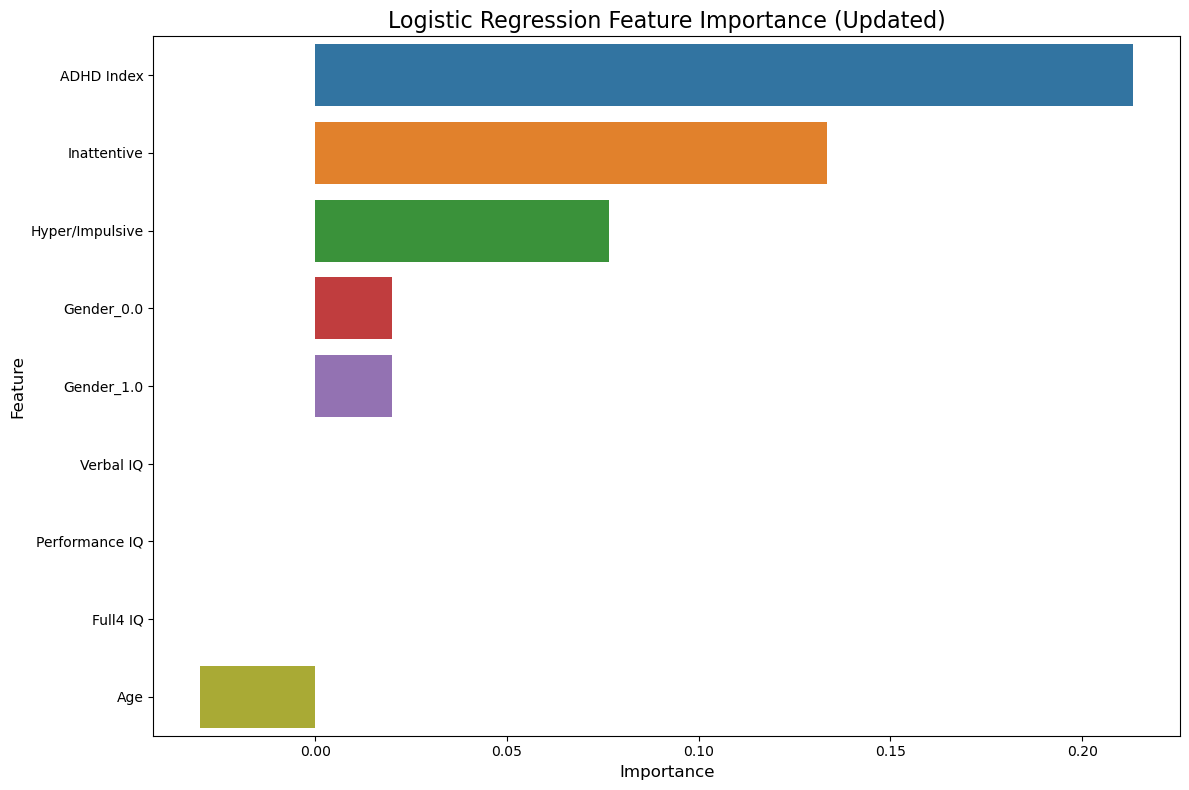

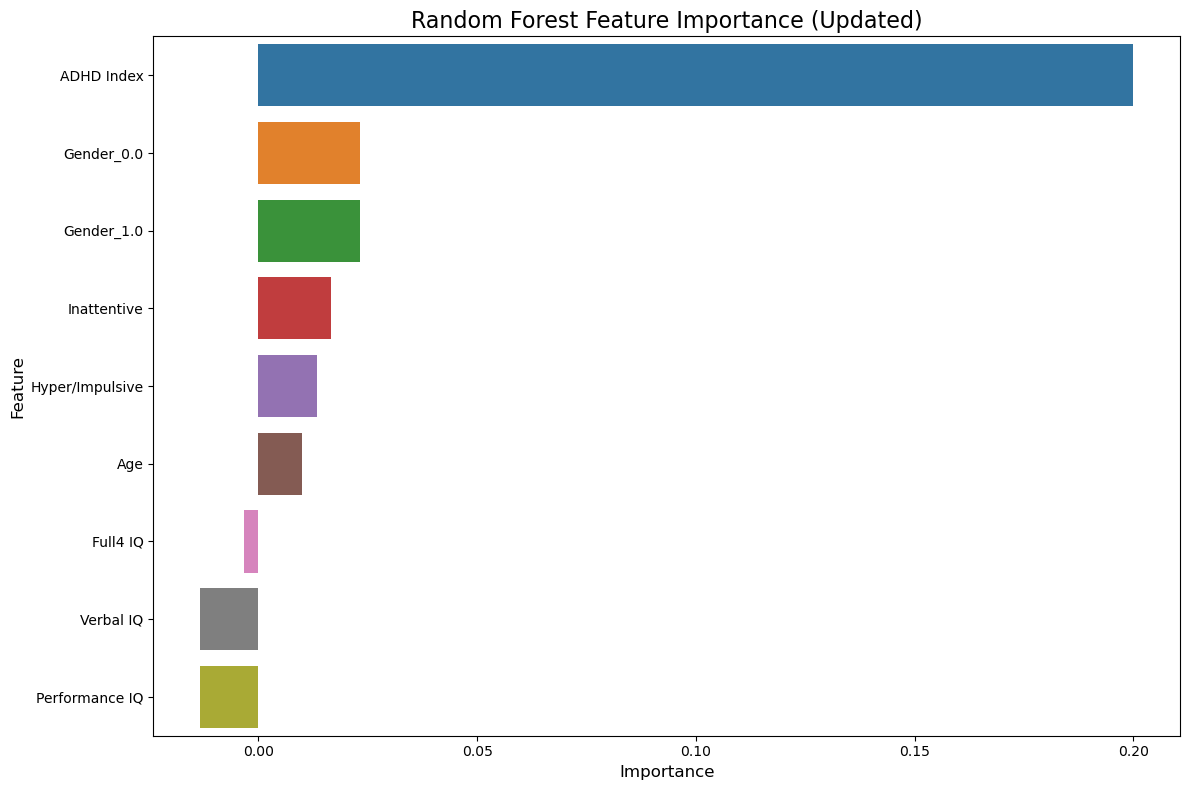

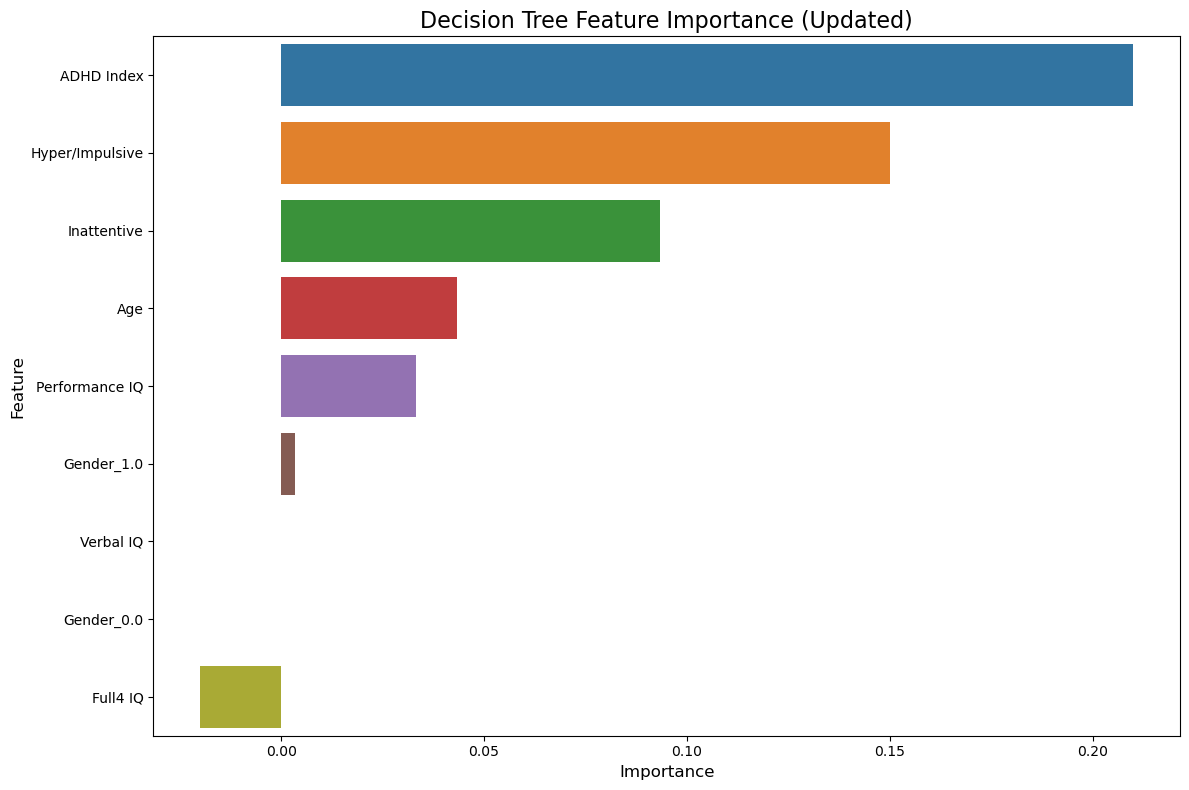

Top features by mean importance (Updated):
                         Feature  Mean_Importance
Feature                                          
ADHD Index                   Age         0.207778
Inattentive             Full4 IQ         0.081111
Hyper/Impulsive   Performance IQ         0.080000
Gender_1.0             Verbal IQ         0.015556
Gender_0.0       Hyper/Impulsive         0.014444
Age                   ADHD Index         0.007778
Performance IQ        Gender_0.0         0.006667
Verbal IQ             Gender_1.0        -0.004444
Full4 IQ             Inattentive        -0.007778


<Figure size 1200x800 with 0 Axes>

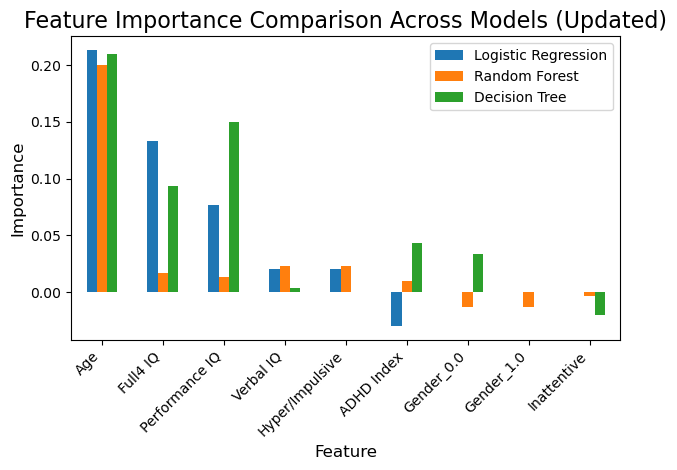

Done


In [219]:
from sklearn.inspection import permutation_importance
# Select features for X

feature_columns = ['Age', 'Gender', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full4 IQ']
X = df[feature_columns]

# Convert 'Gender' into dummy variables
X = pd.get_dummies(X, columns=['Gender'], drop_first=False)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr_model = LogisticRegression(max_iter=2000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Fit models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Function to get feature importance
def get_feature_importance(model, X, y, feature_names, n_repeats=10, random_state=42):
    r = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=-1)
    return pd.DataFrame({
        'Importance': r.importances_mean,
        'Std': r.importances_std,
        'Feature': feature_names
    }).sort_values('Importance', ascending=False)

# Get updated feature importances
lr_importance = get_feature_importance(lr_model, X_test_scaled, y_test, X.columns)
rf_importance = get_feature_importance(rf_model, X_test, y_test, X.columns)
dt_importance = get_feature_importance(dt_model, X_test, y_test, X.columns)

# Function to plot feature importances
def plot_feature_importance(importance_df, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(title, fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot updated feature importances
plot_feature_importance(lr_importance, 'Logistic Regression Feature Importance (Updated)')
plot_feature_importance(rf_importance, 'Random Forest Feature Importance (Updated)')
plot_feature_importance(dt_importance, 'Decision Tree Feature Importance (Updated)')

# Combine all updated feature importances
all_importances_updated = pd.DataFrame({
    'Feature': X.columns,
    'LR_Importance': lr_importance.set_index('Feature')['Importance'],
    'RF_Importance': rf_importance.set_index('Feature')['Importance'],
    'DT_Importance': dt_importance.set_index('Feature')['Importance']
})

# Calculate mean importance and sort
all_importances_updated['Mean_Importance'] = all_importances_updated[['LR_Importance', 'RF_Importance', 'DT_Importance']].mean(axis=1)
all_importances_updated = all_importances_updated.sort_values('Mean_Importance', ascending=False)

print("Top features by mean importance (Updated):")
print(all_importances_updated[['Feature', 'Mean_Importance']])

# Plot combined updated feature importances
plt.figure(figsize=(12, 8))
all_importances_updated.plot(x='Feature', y=['LR_Importance', 'RF_Importance', 'DT_Importance'], kind='bar')
plt.title('Feature Importance Comparison Across Models (Updated)', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.legend(['Logistic Regression', 'Random Forest', 'Decision Tree'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\
Done")

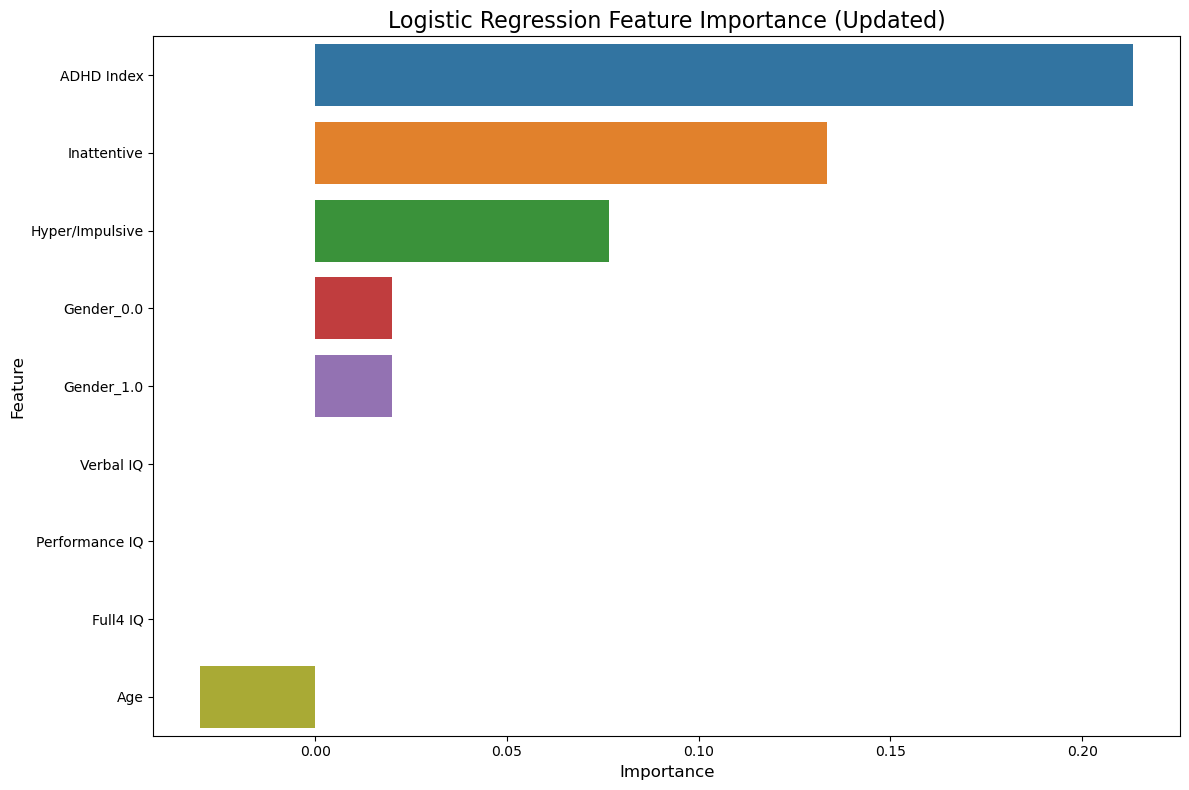

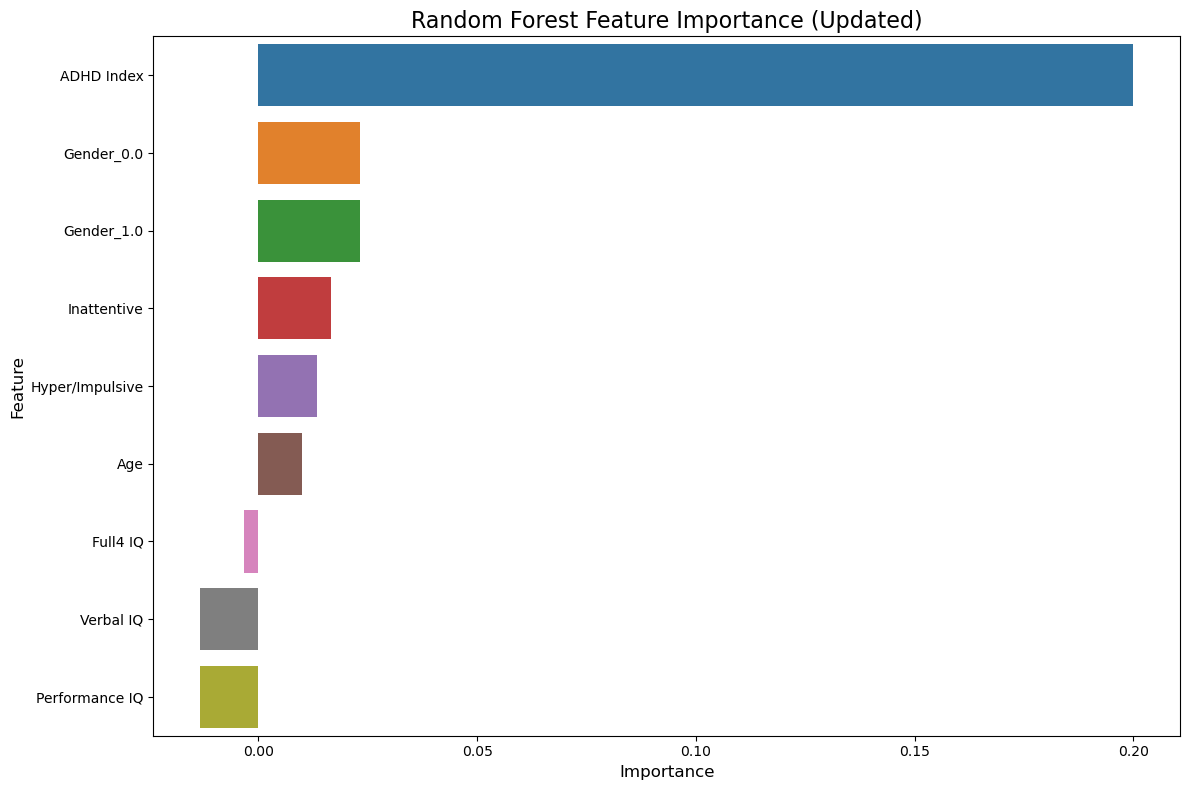

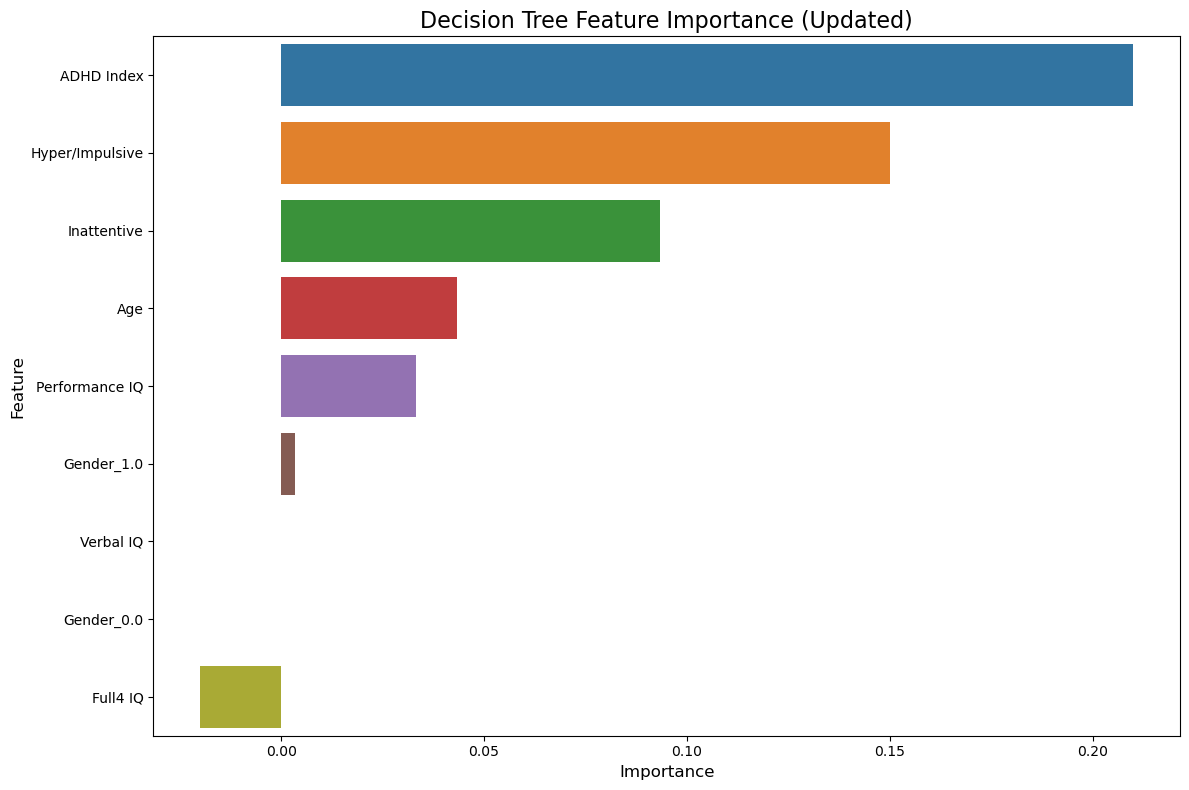

In [227]:
# Function to plot feature importances
def plot_feature_importance(importance_df, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(title, fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot updated feature importances
plot_feature_importance(lr_importance, 'Logistic Regression Feature Importance (Updated)')
plot_feature_importance(rf_importance, 'Random Forest Feature Importance (Updated)')
plot_feature_importance(dt_importance, 'Decision Tree Feature Importance (Updated)')

# Combine all updated feature importances
all_importances_updated = pd.DataFrame({
    'Feature': X.columns,
    'LR_Importance': lr_importance.set_index('Feature')['Importance'],
    'RF_Importance': rf_importance.set_index('Feature')['Importance'],
    'DT_Importance': dt_importance.set_index('Feature')['Importance']
    })

Top features by mean importance (Updated):
                         Feature  Mean_Importance
Feature                                          
ADHD Index                   Age         0.207778
Inattentive             Full4 IQ         0.081111
Hyper/Impulsive   Performance IQ         0.080000
Gender_1.0             Verbal IQ         0.015556
Gender_0.0       Hyper/Impulsive         0.014444
Age                   ADHD Index         0.007778
Performance IQ        Gender_0.0         0.006667
Verbal IQ             Gender_1.0        -0.004444
Full4 IQ             Inattentive        -0.007778


<Figure size 1200x800 with 0 Axes>

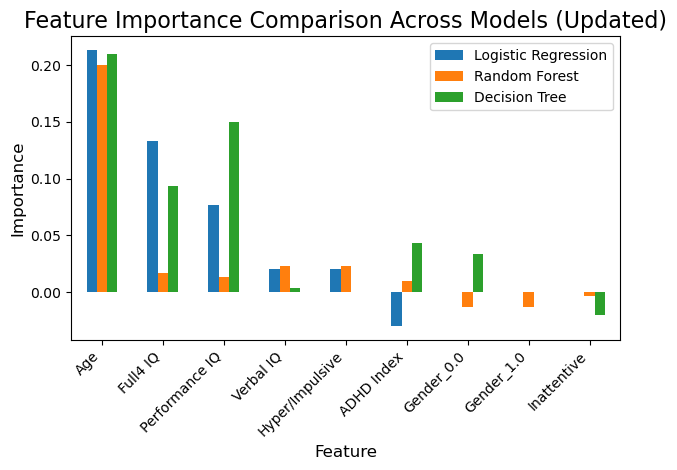

In [229]:
# Calculate mean importance and sort
all_importances_updated['Mean_Importance'] = all_importances_updated[['LR_Importance', 'RF_Importance', 'DT_Importance']].mean(axis=1)
all_importances_updated = all_importances_updated.sort_values('Mean_Importance', ascending=False)

print("Top features by mean importance (Updated):")
print(all_importances_updated[['Feature', 'Mean_Importance']])

# Plot combined updated feature importances
plt.figure(figsize=(12, 8))
all_importances_updated.plot(x='Feature', y=['LR_Importance', 'RF_Importance', 'DT_Importance'], kind='bar')
plt.title('Feature Importance Comparison Across Models (Updated)', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.legend(['Logistic Regression', 'Random Forest', 'Decision Tree'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()